In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

%matplotlib inline

In [2]:
tickers = ["TSLA", "AAPL", "MSFT", "TSM"]
company_names = ["TESLA", "AAPLE", "MICROSOFT", "TAIWAN SEMICONDUCTOR"]
ticker_zip = list(zip(tickers, company_names))
ticker_data = yf.download(tickers, start="2022-01-01", end="2023-02-05", group_by="ticker")

[*********************100%***********************]  4 of 4 completed


In [3]:
dfs = []
for ticker, name in ticker_zip:
    df = ticker_data[ticker].copy()
    df['Name'] = name
    df['Ticker'] = ticker
    dfs.append(df)

ticker_data = pd.concat(dfs)

In [4]:
ticker_data

,Open,High,Low,Close,Adj Close,Volume,Name,Ticker
Date,,,,,,,,
2022-01-03 00:00:00-05:00,382.583344,400.356659,378.679993,399.926666,399.926666,103931400,TESLA,TSLA
2022-01-04 00:00:00-05:00,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,TESLA,TSLA
2022-01-05 00:00:00-05:00,382.216675,390.113342,360.336670,362.706665,362.706665,80119800,TESLA,TSLA
2022-01-06 00:00:00-05:00,359.000000,362.666656,340.166656,354.899994,354.899994,90336600,TESLA,TSLA
2022-01-07 00:00:00-05:00,360.123322,360.309998,336.666656,342.320007,342.320007,84164700,TESLA,TSLA
...,...,...,...,...,...,...,...,...
2023-01-30 00:00:00-05:00,92.849998,94.250000,92.580002,93.129997,93.129997,14079800,TAIWAN SEMICONDUCTOR,TSM
2023-01-31 00:00:00-05:00,91.000000,92.760002,90.000000,92.730003,92.730003,13342100,TAIWAN SEMICONDUCTOR,TSM
2023-02-01 00:00:00-05:00,93.000000,95.769997,92.570000,94.739998,94.739998,16788500,TAIWAN SEMICONDUCTOR,TSM


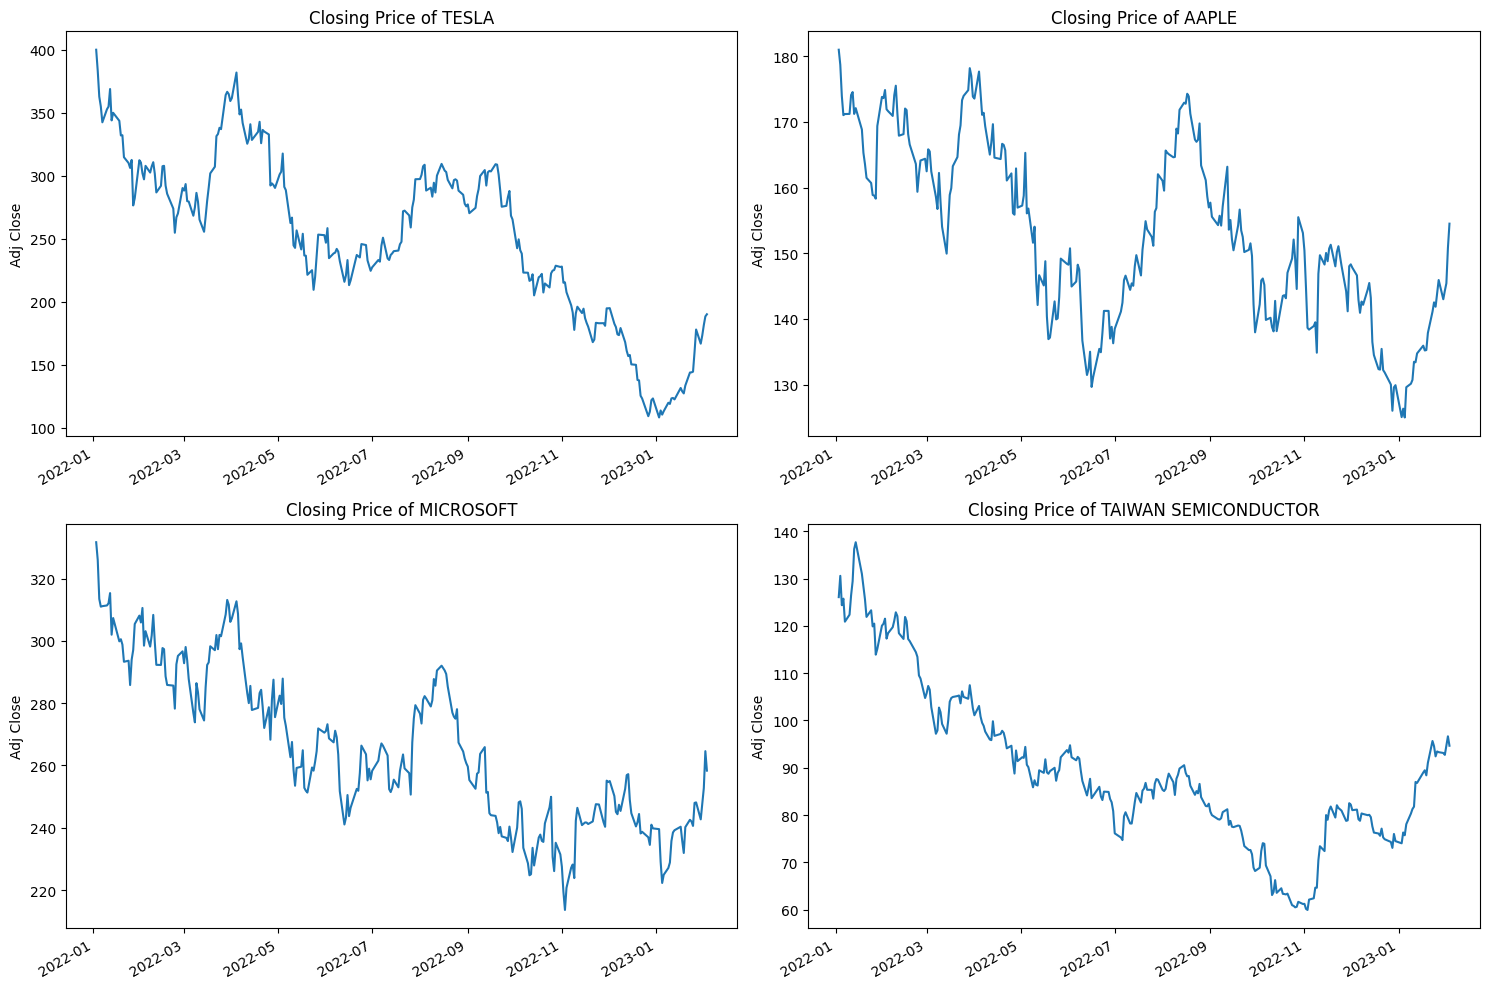

In [5]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, ticker in enumerate(ticker_zip, 1):
    ticker, name = ticker
    plt.subplot(2, 2, i)
    ticker_data[(ticker_data.Ticker == ticker)]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {name}")
plt.tight_layout()
